In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
np.random.seed(42) 

num_samples = 1000

non_bullying_data = {
    'num_hate_words': np.random.randint(0, 3, num_samples // 2),
    'sentiment_score': np.random.uniform(0.1, 0.9, num_samples // 2),
    'num_of_emojis_negative': np.random.randint(0, 2, num_samples // 2),
    'is_first_contact': np.random.randint(0, 2, num_samples // 2),
    'is_cyberbullying': 0
}

bullying_data = {
    'num_hate_words': np.random.randint(2, 6, num_samples // 2),
    'sentiment_score': np.random.uniform(-0.9, -0.1, num_samples // 2),
    'num_of_emojis_negative': np.random.randint(1, 4, num_samples // 2),
    'is_first_contact': np.random.randint(0, 2, num_samples // 2),
    'is_cyberbullying': 1
}

In [4]:
data_non_bullying = pd.DataFrame(non_bullying_data)
data_bullying = pd.DataFrame(bullying_data)

data = pd.concat([data_non_bullying, data_bullying], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True) 

X = data[['num_hate_words', 'sentiment_score', 'num_of_emojis_negative', 'is_first_contact']]
y = data['is_cyberbullying']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nDataset created with {num_samples} samples.")
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print("\nFirst 5 rows of data:")
print(data.head())


Dataset created with 1000 samples.
Training set size: 700 samples
Test set size: 300 samples

First 5 rows of data:
   num_hate_words  sentiment_score  num_of_emojis_negative  is_first_contact  \
0               4        -0.542918                       1                 0   
1               2        -0.774689                       3                 1   
2               2        -0.421175                       2                 1   
3               2        -0.687319                       3                 0   
4               1         0.898154                       0                 1   

   is_cyberbullying  
0                 1  
1                 1  
2                 1  
3                 1  
4                 0  



--- Step 1: Decision Tree Classifier ---
Decision Tree Classifier Accuracy: 1.0000

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



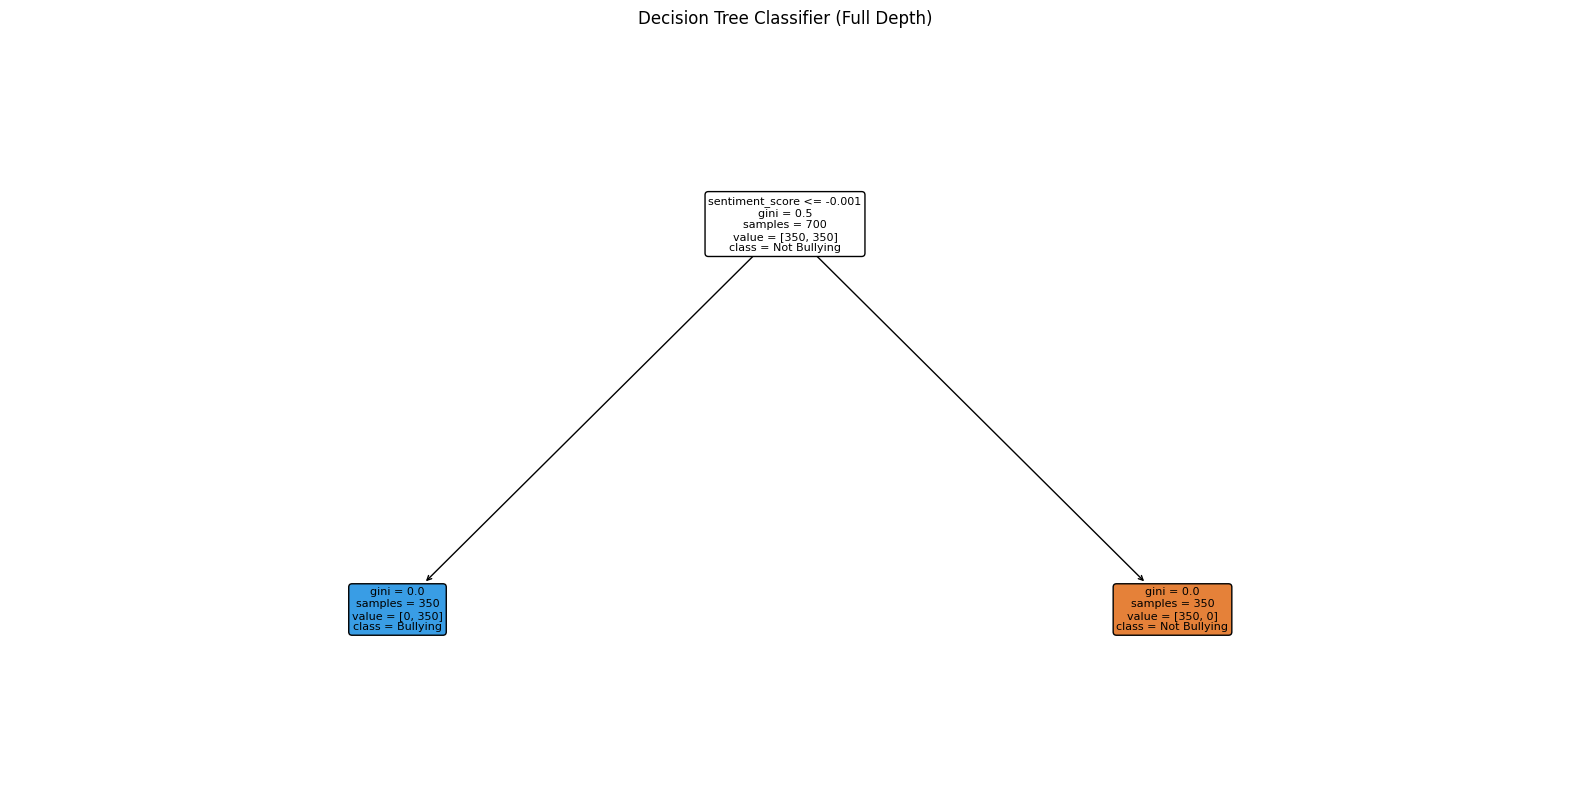

In [5]:
print("\n--- Step 1: Decision Tree Classifier ---")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Visualize the Decision Tree
# For smaller trees, plot_tree is good. For larger trees, graphviz is better.
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=['Not Bullying', 'Bullying'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree Classifier (Full Depth)")
plt.show()

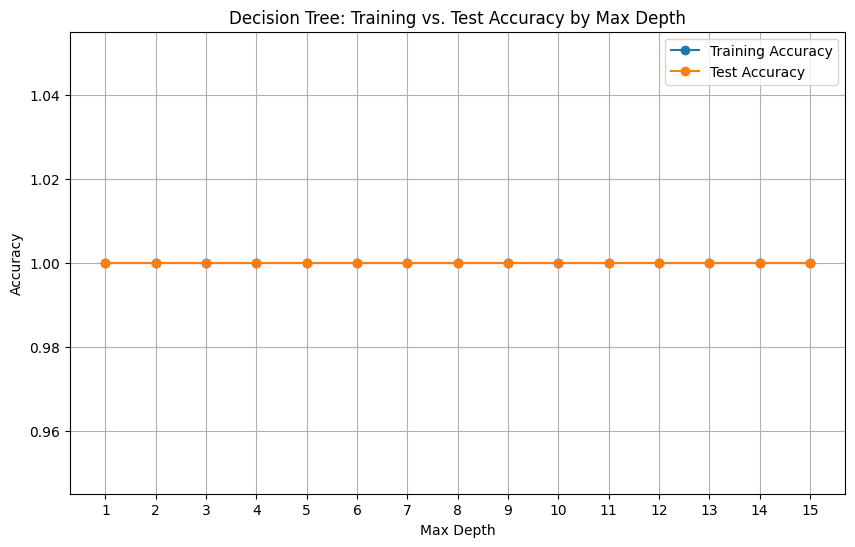

In [6]:
train_accuracies = []
test_accuracies = []
depths = range(1, 16) # Test depths from 1 to 15

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    
    train_pred = dt_temp.predict(X_train)
    test_pred = dt_temp.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Decision Tree: Training vs. Test Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

Optimal Decision Tree (max_depth=4) Accuracy: 1.0000


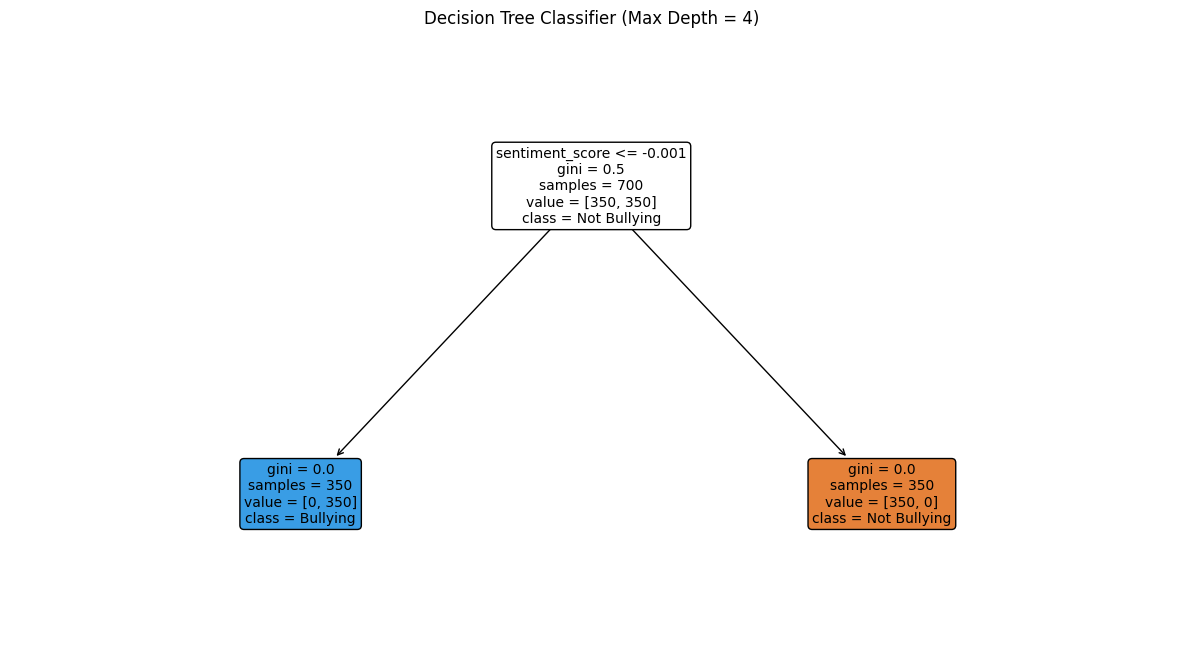

In [7]:
optimal_dt = DecisionTreeClassifier(max_depth=4, random_state=42) # Choose a depth based on the plot
optimal_dt.fit(X_train, y_train)
y_pred_optimal_dt = optimal_dt.predict(X_test)
accuracy_optimal_dt = accuracy_score(y_test, y_pred_optimal_dt)
print(f"Optimal Decision Tree (max_depth=4) Accuracy: {accuracy_optimal_dt:.4f}")

plt.figure(figsize=(15, 8))
plot_tree(optimal_dt,
          feature_names=X.columns.tolist(),
          class_names=['Not Bullying', 'Bullying'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Classifier (Max Depth = 4)")
plt.show()

In [8]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 1.0000

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [9]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
sentiment_score           0.697889
num_hate_words            0.216770
num_of_emojis_negative    0.085291
is_first_contact          0.000049
dtype: float64


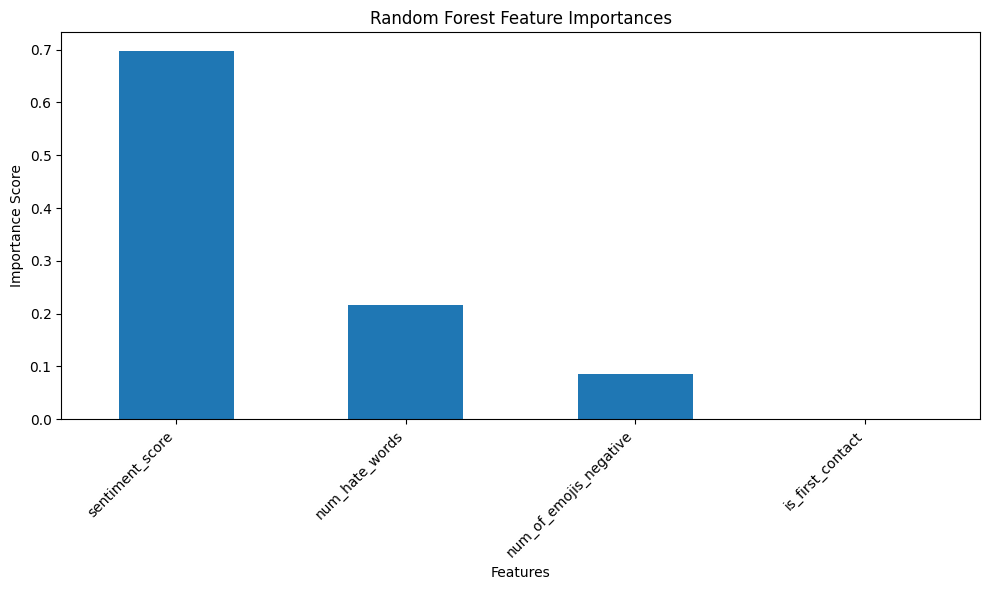

In [10]:
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy') # 5-fold cross-validation
print(f"\nDecision Tree 5-Fold Cross-Validation Accuracies: {cv_scores_dt}")
print(f"Decision Tree Mean CV Accuracy: {np.mean(cv_scores_dt):.4f} (+/- {np.std(cv_scores_dt):.4f})")

# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy') # 5-fold cross-validation
print(f"\nRandom Forest 5-Fold Cross-Validation Accuracies: {cv_scores_rf}")
print(f"Random Forest Mean CV Accuracy: {np.mean(cv_scores_rf):.4f} (+/- {np.std(cv_scores_rf):.4f})")


Decision Tree 5-Fold Cross-Validation Accuracies: [1. 1. 1. 1. 1.]
Decision Tree Mean CV Accuracy: 1.0000 (+/- 0.0000)

Random Forest 5-Fold Cross-Validation Accuracies: [1. 1. 1. 1. 1.]
Random Forest Mean CV Accuracy: 1.0000 (+/- 0.0000)
